In [24]:
from LL import LinkedList
from BST import BinarySearchTree
from Treap import Treap
import random
import time

n = 1000
iteration = 1
lltime = ttime = bsttime = 0
lltimes = []
ttimes = []
bsttimes = []
ns = []
while(lltime + ttime +bsttime  < 30):
    vals = [i for i in range(n)]
    random.shuffle(vals)
    ll = LinkedList()
    bst = BinarySearchTree()
    t = Treap()
    lltime = time.time()
    for val in vals:
        ll.insert(LinkedList.Node(val = val))
    lltime = time.time() - lltime
    lltimes.append(lltime)
    ttime = time.time()
    for val in vals:
        t.head = t.insert(Treap.Node(val=val,priority=Treap.gen_priority()),t.head)
    ttime = time.time() - ttime
    ttimes.append(ttime)
    bsttime = time.time()
    for val in vals:
        bst.insert(child = BinarySearchTree.Node(val = val))
    bsttime = time.time() - bsttime
    bsttimes.append(bsttime)
    ns.append(n)
    print(f"Iteration: {iteration} - n = {n} --",f"Linked list time: {lltime}", f"Treap time: {ttime}", f"BST time: {bsttime}")
    iteration += 1
    n *= 5

Iteration: 1 - n = 1000 -- Linked list time: 0.002997159957885742 Treap time: 0.009999513626098633 BST time: 0.006001472473144531
Iteration: 2 - n = 5000 -- Linked list time: 0.026000261306762695 Treap time: 0.09099721908569336 BST time: 0.04999732971191406
Iteration: 3 - n = 25000 -- Linked list time: 0.14076447486877441 Treap time: 0.26383304595947266 BST time: 0.25377726554870605
Iteration: 4 - n = 125000 -- Linked list time: 0.2996969223022461 Treap time: 1.946664810180664 BST time: 1.028186321258545
Iteration: 5 - n = 625000 -- Linked list time: 1.8786756992340088 Treap time: 12.96297311782837 BST time: 6.863384485244751
Iteration: 6 - n = 3125000 -- Linked list time: 8.086268186569214 Treap time: 67.03196167945862 BST time: 47.50890111923218


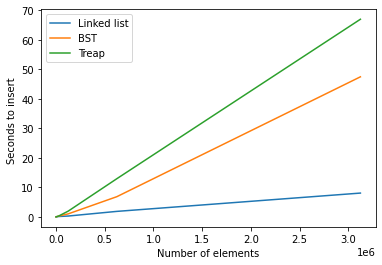

In [25]:
import matplotlib.pyplot as plt

plt.plot(ns, lltimes,label = "Linked list")
plt.plot(ns, bsttimes, label = "BST")
plt.plot(ns, ttimes, label= "Treap")
plt.xlabel("Number of elements")
plt.ylabel("Seconds to insert ")
plt.legend()
plt.show()

In [43]:
insertdict = {f"n: {n}": [lltimes[i],ttimes[i],bsttimes[i]] for (i,n) in enumerate(ns)}
dfinsert = pd.DataFrame(insertdict, index=["Linked List", "Treap", "BST"])
dfinsert

,n: 5000,n: 125000,n: 250000,n: 375000,n: 500000
Linked List,0.002997,0.026000,0.140764,0.299697,1.878676
Treap,0.010000,0.090997,0.263833,1.946665,12.962973
BST,0.006001,0.049997,0.253777,1.028186,6.863384


In [12]:
from LL import LinkedList
from BST import BinarySearchTree
from Treap import Treap
import random
import time


ns = [2000,5000] #veljum tvö n
ms = [1,25,50,75,100]

iteration = 1

search_results = {f"n: {n} - m:{m}": [] for m in ms for n in ns}
#tsearch = {f"n: {n} - m:{m}": [] for m in ms for n in ns}
#bstsearch = {f"n: {n} - m:{m}": [] for m in ms for n in ns}

for n in ns:
    for m in ms:
        vals = [i for i in range(n)]
        random.shuffle(vals)

        search_values = list(list(range(n))*m)
        random.shuffle(search_values)

        ll = LinkedList()
        bst = BinarySearchTree()
        t = Treap()

        #--------------Linked list----------
        for val in vals:
            ll.insert(LinkedList.Node(val = val))

        lltime = time.time()
        for sv in search_values:
            ll.search(sv)
        search_results[f"n: {n} - m:{m}"].append(time.time() - lltime)

        #----------treap-------------
        for val in vals:
            t.head = t.insert(Treap.Node(val=val,priority=Treap.gen_priority()),t.head)

        ttime = time.time()
        for sv in search_values:
            t.search(t.head,sv)
        search_results[f"n: {n} - m:{m}"].append(time.time() - ttime)

        #-----------bst-------
        for val in vals:
            bst.insert(child = BinarySearchTree.Node(val = val))

        bsttime = time.time()
        for sv in search_values:
            bst.search(bst.head,sv)
        search_results[f"n: {n} - m:{m}"].append(time.time() - bsttime)
        print(f"n: {n} - m:{m} on iteration {iteration}")
        iteration += 1


n: 2000 - m:1 on iteration 1
n: 2000 - m:25 on iteration 2
n: 2000 - m:50 on iteration 3
n: 2000 - m:75 on iteration 4
n: 2000 - m:100 on iteration 5
n: 5000 - m:1 on iteration 6
n: 5000 - m:25 on iteration 7
n: 5000 - m:50 on iteration 8
n: 5000 - m:75 on iteration 9
n: 5000 - m:100 on iteration 10


In [34]:
from IPython.display import display
import pandas as pd
rows = ["Linked List", "Treap", "BST"]
df = pd.DataFrame(search_results,index=rows)

df = df[['n: 2000 - m:1', 'n: 2000 - m:25','n: 2000 - m:50','n: 2000 - m:75','n: 2000 - m:100','n: 5000 - m:1','n: 5000 - m:25','n: 5000 - m:50','n: 5000 - m:75', 'n: 5000 - m:100']]
df

,n: 2000 - m:1,n: 2000 - m:25,n: 2000 - m:50,n: 2000 - m:75,n: 2000 - m:100,n: 5000 - m:1,n: 5000 - m:25,n: 5000 - m:50,n: 5000 - m:75,n: 5000 - m:100
Linked List,0.414755,9.997618,20.054981,30.219663,40.478549,3.086565,75.049901,165.269582,254.127041,329.457551
Treap,0.015109,0.243883,0.477156,0.724456,0.866503,0.027232,0.688447,1.351000,2.312558,2.916594
BST,0.006001,0.198514,0.359589,0.488620,0.577130,0.017409,0.465415,1.127999,1.263764,2.008931


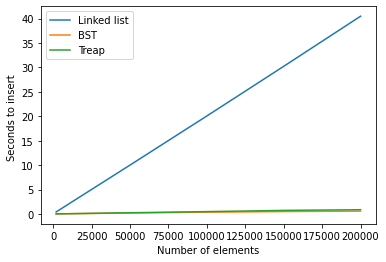

In [40]:
ns = [2000*m for m in [1,25,50,75,100]]
plt.plot(ns, df.loc['Linked List'].tolist()[:5],label = "Linked list")
plt.plot(ns, df.loc['BST'].tolist()[:5], label = "BST")
plt.plot(ns, df.loc['Treap'].tolist()[:5], label= "Treap")
plt.xlabel("Number of elements")
plt.ylabel("Seconds to insert ")
plt.legend()
plt.show()

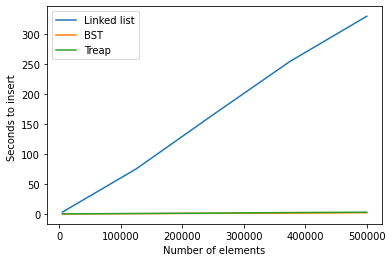

In [42]:
ns = [5000*m for m in [1,25,50,75,100]]
plt.plot(ns, df.loc['Linked List'].tolist()[5:],label = "Linked list")
plt.plot(ns, df.loc['BST'].tolist()[5:], label = "BST")
plt.plot(ns, df.loc['Treap'].tolist()[5:], label= "Treap")
plt.xlabel("Number of elements")
plt.ylabel("")
plt.legend()
plt.show()

In [79]:
n = 5000
C = 1/sum([1/i for i in range(1,n+1)])
P = [C/i for i in range(1,n+1)]

len(P)
keys = []
for i,p in enumerate(P):
    keys.extend([i for _ in range(round(n*p))])


In [80]:
len(keys)


4314